#  UNIDAD 2 MATEMATICAS II

Practicas de la Undad 2 de Matematicas de Ciencias Sociales de 2ºBach

---

## Tabla de Contenidos
  
  1. [MA2 - Práctica 2.1: Programación lineal ](#2.1) 
  
   + [Ejercicio 1](#2.1.1)    
   
   + [Ejercicio 2](#2.1.2)   
   
   + [Ejercicio 3](#2.1.3)
   
   + [Ejercicio 4](#s2.1.4)
   
   
  2. [MA2 - Tarea 2.2: ¿Dulcero o goloso?](#2.2)


  3. [MA2 - Tarea 2.3: Con la ayuda de la tecnología, mejor](#2.3)
  
  
   + [Utilizando Matplotlib](#2.3.5)    
   
   + [Utilizando Sympy](#2.3.4)   
   
   + [Utilizando Numpy](#2.3.3)
   
   + [Utilizando Mathway](#2.3.1)
   
   + [Utilizando Matrix Calculator](#2.3.2)
  
### Adicional:

<a href="http://www.juntadeandalucia.es/educacion/permanente/materiales/index.php?etapa=4&materia=278&unidad=2#space" class="badge badge-primary">Recursos</a>
<a href="http://agrega.juntadeandalucia.es/visualizador-1/Visualizar/Visualizar.do?identificador=es-an_2019061212_9125600&secuencia=true" class="badge badge-success">Practica 2.1</a>
<a href="http://agrega.juntadeandalucia.es/visualizador-1/Visualizar/Visualizar.do?identificador=es-an_2019061212_9130200&secuencia=true" class="badge badge-danger">Practica 2.2</a>
<a href="http://agrega.juntadeandalucia.es/visualizador-1/Visualizar/Visualizar.do?identificador=es-an_2019061212_9130215&secuencia=true" class="badge badge-warning">Practica 2.3</a>
<a href="https://nbviewer.jupyter.org/github/fr98acsta/MAT-U2-Programacion-Lineal-Practicas/blob/master/Programacion_Lineal.ipynb" class="badge badge-info">Ejercicios Unidad 1</a>



---

In [1]:
from sympy.solvers import solve
from sympy import Symbol
from sympy import Eq,solve_linear_system,Matrix
from sympy import S, Interval 
from sympy.plotting import plot

import re
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
sp.init_printing()
from IPython.core.display import HTML


In [2]:
class Interseccion() :
    eqs = []
    nn = []
    flag = True
    count=0
    x=0
    y=0
    
    def __init__(self):
        print('Presiona "q" para terminar de introducir los segmentos a tomar')
        while self.flag:
            
            txt = input("Introduce la ecuacion: ")
            if txt == 'q':
                self.flag = False
            else:

                #Check if the string contains any digits (numbers from 0-9):
                x_t = re.sub("(\Ax?)x", lambda y: "+1x" if y.group() == "x" else "-1x", txt)
                x_t = re.sub("=(x?)x", lambda y: "=+1x" if y.group() == "=x" else "=-1x", x_t)
                x_t = re.sub("([-]+[x]?|[+]+[x]?)x", lambda y: "-1y" if y.group() == "-x" else "+1x", x_t)
                x = re.findall("(\d+[x]?|[-]+\d+[x]?|[+]+\d+[x]?)x|=", x_t)
                #print(x)

                igual = x.index("")
                x[igual]='='
                #print(x)

                # x[:igual]
                # x[igual+1:]
                x_d = map(float, x[:igual])
                x_i = map(float, x[igual+1:])

                x_d = sum(x_d)
                #print(x_d)
                x_i = sum(x_i)
                #print(x_i)	

                x_fin=x_d-x_i
                #print(x_fin)

                ###################


                y_t = re.sub("(\Ay?)y", lambda y: "+1y" if y.group() == "y" else "-1y", txt)
                y_t = re.sub("=(y?)y", lambda y: "=+1y" if y.group() == "=y" else "=-1y", y_t)
                y_t = re.sub("([-]+[y]?|[+]+[y]?)y", lambda y: "-1y" if y.group() == "-y" else "+1y", y_t)
                y = re.findall("(\d+[y]?|[-]+\d+[y]?|[+]+\d+[y]?)y|=", y_t)
                #print(y)

                igual = y.index("")
                y[igual]='='
                #print(y)

                # y[:igual]
                # y[igual+1:]
                y_d = map(float, y[:igual])
                y_i = map(float, y[igual+1:])

                y_d = sum(y_d)
                #print(y_d)
                y_i = sum(y_i)
                #print(y_i)	

                y_fin=y_d-y_i
                #print(y_fin)

                #################

                n = re.sub("\d+x|\d+y", '', txt)
                #print(n)
                n = re.findall("[-]+\d+|\d+|=", n)

                #print(n)
                igual = n.index("=")
                n_d = map(float, n[igual+1:])
                n_i = map(float, n[:igual])

                n_d = sum(n_d)
                #print(n_d)
                n_i = sum(n_i)
                #print(x_i)	

                n_fin=n_d-n_i
                #print(n_fin)
                self.nn.append(n_fin)
                s = f'eqt{self.count}={[x_fin,y_fin]}'
                exec(s)
                self.eqs.append(1)
                s = f'self.eqs{[self.count]}=eqt{self.count}'
                exec(s)
                #print(self.eqs)


                self.count+=1
                
    def punto(self):
        #print(len(self.eqs))
        if len(self.eqs)==2:
            a = np.append([self.eqs[0]], [self.eqs[1]],axis=0)
        elif len(self.eqs)==3:
            a = np.append([self.eqs[0]], [self.eqs[1]],[self.eqs[2]],axis=1)
        elif len(self.eqs)==4:
            a = np.append([self.eqs[0]], [self.eqs[1]],[self.eqs[2]],[self.eqs[3]],axis=1)
        elif len(self.eqs)==1:
            print("Has de introducir 2 Ecuaciones")
            
        b = np.append([self.nn],[])

        am =np.linalg.solve(a,b)
        self.y=am[1]
        self.x=am[0]
        self.eqs.clear()
        self.nn.clear()
        #print(f"x => {self.x}\ny => {self.y}")
        
        #except:
         #   print('Vuelvelo a Intentar')
            
## MEJORRARLA REDUCIENDOLA Y SOBRETODO CREAR UNA CON PULP LIBRARY 
##ASI PODER CREAR UN RESOLVEDOR DE PROGRAMACION LINEA FACIL Y RAPIDO CON IMPRESION


In [3]:
from pulp import * 

class Min():
    
    def __init__(self):
        
        x = pulp.LpVariable("x", lowBound=0, cat='Integer') 
        y = pulp.LpVariable("y", lowBound=0, cat='Integer')

        problem = pulp.LpProblem("Ejercico - 3", pulp.LpMinimize) 

        problem += 2*x+3*y, "Funcion Objetivo" 
        problem += x+y >= 3, "1st constraint"
        problem += x+2*y <= 6, "2nd constraint"


        problem.solve()
        listam=[]
        print ("Optimal Result:")
        for variable in problem.variables():
            print (variable.name, "=", variable.varValue)
            listam.append(variable.varValue)
        print ("Minimizacion")
        ingreso = value(problem.objective)
        print (f'{ingreso}\n\n')
        
        
        xy1 = Interseccion()
        xy1.punto()

        xy2 = Interseccion()
        xy2.punto()

        xy3 = Interseccion()
        xy3.punto()

        xy4 = Interseccion()
        xy4.punto()

        x = np.linspace(-10,15,2000)
        y1= 3-x
        y2= (6-x)/2
        y3= 0*x
        y4= (ingreso - 2*x)/3
        
        plt.plot(x, y1,color='green', label=r'$y+x\leq 3 $')
        plt.plot(x, y2,'r', label=r'$x+2y\leq6$')
        plt.plot(x, y3, label=r'$0\leq y$')
        plt.plot(x, y4,'k--')
        #plt.axvline(10, color='blue', label=r'$x\leq 10 $') 

        plt.axvline(0,color='grey', label=r'$0\leq x $') 
        plt.plot(int(xy1.x),int(xy1.y),"ro", label=f'$({int(xy1.x)},{int(xy1.y)})$')
        plt.plot(int(xy2.x),int(xy2.y),"ro", label=f'$({int(xy2.x)},{int(xy2.y)})$')
        plt.plot(int(xy3.x),int(xy3.y),"ro", label=f'$({int(xy3.x)},{int(xy3.y)})$')
        plt.plot(int(xy4.x),int(xy4.y),"ro", label=f'$({int(xy4.x)},{int(xy4.y)})$')
        plt.plot(listam[0],listam[1],"ko", label=f"Solucion:\n x: {listam[0]}\n y: {listam[1]}")
        plt.xlim((-10, 15))
        plt.ylim((-10, 15))


        plt.legend(loc="upper left")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        d = np.linspace(-10,15,2000)

        x,y = np.meshgrid(d,d)
        region = plt.imshow( ((0<=y) & (0<=x) & (x+y >= 3) & (x+2*y <= 6)).astype(float) , 
                       extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
        plt.show()

        
class Max():
    
    def __init__(self):
        
        x = pulp.LpVariable("x", lowBound=0, cat='Integer') 
        y = pulp.LpVariable("y", lowBound=0, cat='Integer')

        problem = pulp.LpProblem("Ejercico - 3", pulp.LpMaximize) 

        problem += 2*x+3*y, "Funcion Objetivo" 
        problem += x+y >= 3, "1st constraint"
        problem += x+2*y <= 6, "2nd constraint"


        problem.solve()
        lista=[]
        print ("Optimal Result:")
        for variable in problem.variables():
            print (variable.name, "=", variable.varValue)
            lista.append(variable.varValue)
        print ("Maximizacion")
        ingreso = value(problem.objective)
        print (f'{ingreso}\n\n')
        
        
        xy1 = Interseccion()
        xy1.punto()

        xy2 = Interseccion()
        xy2.punto()

        xy3 = Interseccion()
        xy3.punto()

        xy4 = Interseccion()
        xy4.punto()

        x = np.linspace(-10,15,2000)
        y1= 3-x
        y2= (6-x)/2
        y3= 0*x
        y4= (ingreso - 2*x)/3
        
        plt.plot(x, y1,color='green', label=r'$y+x\leq 3 $')
        plt.plot(x, y2,'r', label=r'$x+2y\leq6$')
        plt.plot(x, y3, label=r'$0\leq y$')
        plt.plot(x, y4,'k--')
        #plt.axvline(10, color='blue', label=r'$x\leq 10 $') 

        plt.axvline(0,color='grey', label=r'$0\leq x $') 
        plt.plot(int(xy1.x),int(xy1.y),"ro", label=f'$({int(xy1.x)},{int(xy1.y)})$')
        plt.plot(int(xy2.x),int(xy2.y),"ro", label=f'$({int(xy2.x)},{int(xy2.y)})$')
        plt.plot(int(xy3.x),int(xy3.y),"ro", label=f'$({int(xy3.x)},{int(xy3.y)})$')
        plt.plot(int(xy4.x),int(xy4.y),"ro", label=f'$({int(xy4.x)},{int(xy4.y)})$')
        plt.plot(lista[0],lista[1],"ko", label=f"Solucion:\n x: {lista[0]}\n y: {lista[1]}")
        plt.xlim((-10, 15))
        plt.ylim((-10, 15))


        plt.legend(loc="upper left")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        d = np.linspace(-10,15,2000)

        x,y = np.meshgrid(d,d)
        region = plt.imshow( ((0<=y) & (0<=x) & (x+y >= 3) & (x+2*y <= 6)).astype(float) , 
                       extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
        plt.show()
        
        
class Max_4():
    
    def __init__(self):
        
        Camisas = pulp.LpVariable("Camisas", lowBound=0, cat='Integer')
        Pantalones = pulp.LpVariable("Pantalones", lowBound=0, cat='Integer') 
        

        problem = pulp.LpProblem("Ejercico - 3", pulp.LpMaximize) 

        problem += 40*Pantalones+25*Camisas, "Funcion Objetivo" 
        problem += 2000*Pantalones+1000*Camisas <= 124000, "1st constraint"
        problem += 75*Pantalones+50*Camisas <= 50000, "2nd constraint"


        problem.solve()
        lista=[]
        print ("Optimal Result:")
        for variable in problem.variables():
            print (f'{variable.name} = {variable.varValue} unds.')
            lista.append(variable.varValue)
        print ("Maximizacion Beneficio:")
        ingreso = value(problem.objective)
        print (f'{ingreso}€\n\n')
        
        
        xy1 = Interseccion()
        xy1.punto()

        xy2 = Interseccion()
        xy2.punto()

        xy3 = Interseccion()
        xy3.punto()

        xy4 = Interseccion()
        xy4.punto()
        
        xy5 = Interseccion()
        xy5.punto()
        
        
        x = np.linspace(-10,150,2000)
        y1= (50-0.75*x)/0.5
        y2= (124-2*x)
        y3= 0*x
        y4= (ingreso - 40*x)/25
        
        plt.plot(x, y2,color='green', label=r'$y+2x\leq 124 $')
        plt.plot(x, y1,'r', label=r'$0.75x+0.5y\leq50$')
        plt.plot(x, y3, label=r'$0\leq y$')
        plt.plot(x, y4,'k--')
        #plt.axvline(10, color='blue', label=r'$x\leq 10 $') 

        plt.axvline(0,color='grey', label=r'$0\leq x $') 
        plt.plot(int(xy1.x),int(xy1.y),"ro", label=f'$({int(xy1.x)},{int(xy1.y)})$')
        plt.plot(int(xy2.x),int(xy2.y),"ro", label=f'$({int(xy2.x)},{int(xy2.y)})$')
        plt.plot(int(xy3.x),int(xy3.y),"ro", label=f'$({int(xy3.x)},{int(xy3.y)})$')
        plt.plot(int(xy4.x),int(xy4.y),"ro", label=f'$({int(xy4.x)},{int(xy4.y)})$')
        plt.plot(int(xy5.x),int(xy5.y),"ro", label=f'$({int(xy5.x)},{int(xy5.y)})$')
        plt.plot(0,0,"ro", label=f'$({0},{0})$')
        plt.plot(lista[1],lista[0],"ko", label=f"Solucion:\n x: {lista[1]}\n y: {lista[0]}")
        plt.xlim((-10, 150))
        plt.ylim((-10, 150))


        plt.legend(loc="upper left")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        d = np.linspace(-10,150,2000)

        x,y = np.meshgrid(d,d)
        region = plt.imshow( ((0<=y) & (0<=x) & (75*x+50*y <= 50000) & (2000*x+1000*y <= 124000)).astype(float) , 
                       extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
        plt.show()

class Max_u2():
    
    def __init__(self):
        
        Caja1 = pulp.LpVariable("Caja1", lowBound=0, cat='Integer')
        Caja2 = pulp.LpVariable("Caja2", lowBound=0, cat='Integer') 
        

        problem = pulp.LpProblem("Ejercico - 3", pulp.LpMaximize) 

        problem += 8*Caja1+12*Caja2, "Funcion Objetivo" 
        problem += 4*Caja1+4*Caja2<= 200, "1st constraint"
        problem += 2*Caja1+4*Caja2 <= 160, "2nd constraint"
        problem += 6*Caja1+8*Caja2 <= 360, "3d constraint"

        problem.solve()
        lista=[]
        print ("Optimal Result:")
        for variable in problem.variables():
            print (f'{variable.name} = {variable.varValue} unds.')
            lista.append(variable.varValue)
        print ("Maximizacion Beneficio:")
        ingreso = value(problem.objective)
        print (f'{ingreso}€\n\n')
        
        
        xy1 = Interseccion()
        xy1.punto()

        xy2 = Interseccion()
        xy2.punto()

        xy3 = Interseccion()
        xy3.punto()

        
        
        x = np.linspace(-10,90,2000)
        y1= (200 - 4*x)/4
        y2= (160-2*x)/4
        y3= (360-6*x)/8
        y5= 0*x
        y4= (ingreso - 8*x)/12

        plt.plot(x, y2,color='orange', label=r'$4y+2x\leq 160 $')
        plt.plot(x, y1,'g', label=r'$4x+4y\leq200$')
        plt.plot(x, y3,'b', label='$8y+6x\leq 360$')
        plt.plot(x, y4,'k--')
        plt.plot(x, y5,label=r'$0\leq y $')
        #plt.axvline(10, color='blue', label=r'$x\leq 10 $') 

        plt.axvline(0,color='grey', label=r'$0\leq x $') 
        plt.plot(int(xy1.x),int(xy1.y),"ro", label=f'$({int(xy1.x)},{int(xy1.y)})$')
        plt.plot(int(xy2.x),int(xy2.y),"ro", label=f'$({int(xy2.x)},{int(xy2.y)})$')
        plt.plot(int(xy3.x),int(xy3.y),"ro", label=f'$({int(xy3.x)},{int(xy3.y)})$')
        #plt.plot(int(xy4.x),int(xy4.y),"ro", label=f'$({int(xy4.x)},{int(xy4.y)})$')
        #plt.plot(int(xy5.x),int(xy5.y),"ro", label=f'$({int(xy5.x)},{int(xy5.y)})$')
        plt.plot(0,0,"ro", label=f'$({0},{0})$')
        plt.plot(lista[0],lista[1],"ko", label=f"Solucion:\n x: {lista[0]}\n y: {lista[1]}")
        plt.xlim((-10, 90))
        plt.ylim((-10, 70))

        plt.fill_between(x,y1, color='green', alpha=0.2)
        plt.fill_between(x,y2, color='orange', alpha=0.2)
        plt.fill_between(x,y3, color='blue', alpha=0.2)
        plt.legend(loc="upper left")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

        d = np.linspace(-10,90,2000)

        x,y = np.meshgrid(d,d)
        region = plt.imshow( ((0<=y) & (0<=x) & (4*x+4*y<= 200) & (2*x+4*y <= 160) & (6*x+8*y <= 360)).astype(float) , 
                       extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
        plt.show()




In [4]:
class Solucion():
    
    solu = []
    incorrecta = []
    flag = True
    count=0
    x=0
    y=0
    puntos = []
    def __init__(self):
        
        print('Presiona "q" para terminar de introducir los puntos a tomar')
        while self.flag:

            txt = input("Introduce los puntos --> (x,y): ")
            if txt == 'q':
                self.flag = False
            else:
                x = re.findall('\d+|\d+[^,)-+]|[-]\d+[^,)-+]|[+]\d+[^,)-+]', txt)
                #rint(x)
                #rint(int(x[0]))
                #rint(int(x[1]))
                
                self.puntos.append([int(x[0]),int(x[1])])
                
        self.solu.append(self.s1())
        self.solu.append(self.s2())
        self.solu.append(self.s3())
        print('\n\nLas soluciones son:\n ')

        for sol in self.solu:
            if sol == 'Sistema 1' or sol == 'Sistema 2' or sol == 'Sistema 3':
                print(f'\t{sol}\n')
            else:
                self.incorrecta.append(sol)

        print('\nLos Sistemas incorrectos son:\n')
        for inc in self.incorrecta:
            print(f'\t{inc}\n')
                    
                
                
    def s1(self):
        cunt = 0
        for x in self.puntos:
            
            s1 = [2*x[0]+x[1]>=20,2*x[0]-x[1]<=20,0<=x[0]<=20]
            count = 0
            #sistemas= [s1,s2,s3]
            for i,x in enumerate(s1):
                if x == True:
                    cunt+=1
                else:
                    break

            if count == len(s1):
                cunt+=1
            else:
                break
        if cunt == 3:
            return 'Sistema 1'
        else:
            return'Sistema 1 '

    def s2(self):
        cunt = 0
        for x in self.puntos:
            
            s2 = [2*x[0]+x[1]>=20,2*x[0]-x[1]<=20,0<=x[1]<=20]
            count = 0
            #sistemas= [s1,s2,s3]
            for i,x in enumerate(s2):
                if x == True:
                    cunt+=1
                else:
                    break

            if count == len(s2):
                cunt+=1
            else:
                break
        if cunt == 3:
            return 'Sistema 2'
        else:
            return'Sistema 2 '
            
    def s3(self):
        cunt = 0
        for x in self.puntos:
            
            s3 = [2*x[0]+x[1]<=20,2*x[0]-x[1]>=20,0<=x[1]<=20]
            count = 0
            #sistemas= [s1,s2,s3]
            for i,x in enumerate(s3):
                if x == True:
                    count+=1
                else:
                    break
            #print(cunt)
            if count == len(s3):
                cunt+=1
            else:
                break
        #rint(cunt)
        if cunt == 3:
            return 'Sistema 3'
        else:
            return'Sistema 3 '
            
            

 ## MEJORAR CON OPERATOR Y REGEX PARA ASI PODERLO UTILIZAR CON CUALQUIER SISTEMA
## UNIRLO CON EL DE INTERSECCION Y CREAR UNA PARA LA REGION FACTIBLE


# MA2 - Práctica 2.1: Programación lineal <a name="2.1"></a>

### **Ejercicio 1** <a name="2.1.1"></a>

> Dadas las siguientes restricciones:
            
               0≤ x ≤ 10

               x ≤ y

               y-2x ≤ 6
       
> Representa la región limitada por dichas inecuaciones y calcula sus vértices



Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=0
Introduce la ecuacion: x=y
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=10
Introduce la ecuacion: x=y
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=0
Introduce la ecuacion: y-2x=6
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=10
Introduce la ecuacion: y-2x=6
Introduce la ecuacion: q


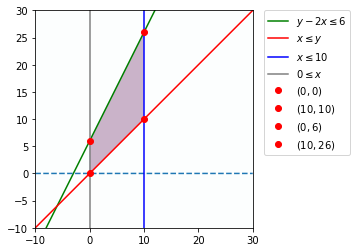

In [33]:

xy1 = Interseccion()
xy1.punto()

xy2 = Interseccion()
xy2.punto()

xy3 = Interseccion()
xy3.punto()

xy4 = Interseccion()
xy4.punto()

x = np.linspace(-10,30,2000)
y1= 6+2*x
y2= x
y3=0*x
plt.plot(x, y1,color='green', label=r'$y-2x\leq 6 $')
plt.plot(x, y2,'r', label=r'$x\leq y$')
plt.plot(x, y3,'--')
plt.axvline(10, color='blue', label=r'$x\leq 10 $') 
plt.axvline(0,color='grey', label=r'$0\leq x $') 
plt.plot(int(xy1.x),int(xy1.y),"ro", label=f'$({int(xy1.x)},{int(xy1.y)})$')
plt.plot(int(xy2.x),int(xy2.y),"ro", label=f'$({int(xy2.x)},{int(xy2.y)})$')
plt.plot(int(xy3.x),int(xy3.y),"ro", label=f'$({int(xy3.x)},{int(xy3.y)})$')
plt.plot(int(xy4.x),int(xy4.y),"ro", label=f'$({int(xy4.x)},{int(xy4.y)})$')
plt.xlim((-10, 30))
plt.ylim((-10, 30))


#plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

d = np.linspace(-10,30,2000)

x,y = np.meshgrid(d,d)
region = plt.imshow( ((0<=x) & (x<=10) & (x<=y) & (y-2*x<= 6)).astype(float) , 
               extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
plt.show()


### Ejercicio 2 <a name="2.1.2"></a>

> Dada la siguiente región factible:

![alt text](http://agrega.juntadeandalucia.es/repositorio/12062019/27/es-an_2019061212_9125600/programacion_lineal.png "Region Factible")

>  y justifica de cuál de los siguientes sistemas de inecuaciones es solución:

<table class="table">
  <thead>
    <tr>
      <th scope="col">#</th>
      <th scope="col">Sistema 1</th>
      <th scope="col">Sistema 2</th>
      <th scope="col">Sistema 3</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">1</th>
      <td>2x+y≥20</td>
      <td>2x+y≥20</td>
      <td>2x+y≤20</td>
    </tr>
    <tr>
      <th scope="row">2</th>
      <td>2x-y≤20</td>
      <td>2x-y≤20</td>
      <td>2x-y≥20</td>
    </tr>
    <tr>
      <th scope="row">3</th>
      <td>0≤x≤20</td>
      <td>0≤y≤20</td>
      <td>0≤y≤20</td>
    </tr>
  </tbody>
</table>

In [6]:
    
sistemas = Solucion()

Presiona "q" para terminar de introducir los puntos a tomar
Introduce los puntos --> (x,y): 0,20
Introduce los puntos --> (x,y): 20,20
Introduce los puntos --> (x,y): 10,0
Introduce los puntos --> (x,y): q


Las soluciones son:
 
	Sistema 1

	Sistema 2


Los Sistemas incorrectos son:

	Sistema 3 



### Ejercicio 3 <a name="2.1.3"></a>

> Maximiza y minimiza la función F(x,y)=2x+3y con las siguientes restricciones:


<div class="container">
  <div class="top">
    <span class="dot"></span>
    <span class="dot"></span>
    <span class="dot"></span>
  </div>

  <div class="content">
    <h3>Constraints</h3>
      
        x ≥0

       y ≥ 0

       x+y ≥ 3

       x+2y ≤ 6
      
  </div>
</div>



#### MAXIMIZACION


Optimal Result:
x = 6.0
y = 0.0
Maximizacion
12.0


Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=0
Introduce la ecuacion: x+y=3
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: y=0
Introduce la ecuacion: x+y=3
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=0
Introduce la ecuacion: x+2y=6
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: y=0
Introduce la ecuacion: x+2y=6
Introduce la ecuacion: q


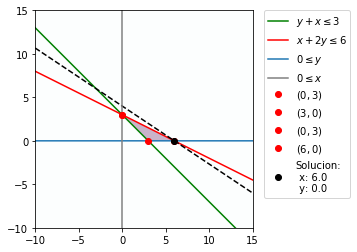

In [13]:
Max()


#### MINIMIZACION


C:\Anaconda3\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal Result:
x = 3.0
y = 0.0
Minimizacion
6.0


Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=0
Introduce la ecuacion: x+y=3
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: y=0
Introduce la ecuacion: x+y=3
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=0
Introduce la ecuacion: x+2y=6
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: y=0
Introduce la ecuacion: x+2y=6
Introduce la ecuacion: q


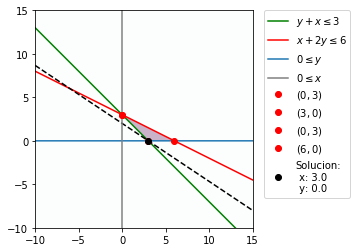

In [5]:
Min()


### Ejercicio 4 <a name="2.1.4"></a>

> Un fabricante diseña pantalones y camisas. Para ello dispone de 50 metros de tejido de algodón y 124 metros de tejido de lino. Cada pantalón precisa 0’75 metros de algodón y 2 metros de lino. Para cada camisa se necesitan 0’5 metros de algodón y 1 metro de lino. El precio de mercado del pantalón es de 40 € y el de la camisa de 25 €. Se trata de encontrar el número de pantalones y camisas que debe diseñar el fabricante para obtener unos ingresos máximos.

> a) Completa la siguiente tabla con los datos del problema.


<table class="table">
  <thead>
    <tr>
      <th scope="col"> </th>
      <th scope="col">Metros de Algodon</th>
      <th scope="col">Metros de Lino</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row">Pantalon</th>
      <td>0.7x</td>
      <td>2x</td>
    </tr>
    <tr>
      <th scope="row">Camiseta</th>
      <td>0.5y</td>
      <td>y</td>
    </tr>
  </tbody>
</table>





> b) Elige las incógnitas convenientemente y escribe las restricciones del problema .


In [26]:
x,y = sp.symbols('x y')
from sympy.solvers.inequalities import reduce_inequalities


eq1 = sp.Function('eq1')
eq2 = sp.Function('eq2')
eq3 = sp.Function('eq3')
eq4 = sp.Function('eq4')


eq1 = reduce_inequalities(x>=0)
eq2 = reduce_inequalities(y>=0)
eq3 = reduce_inequalities(0.75*x+0.5*y<=50, x)
eq4 = reduce_inequalities(2*x+y<=50, x)

print('RESTRINGCIONES:\n')
display(eq1)
display(eq2)
display(eq3)
display(eq4)



RESTRINGCIONES:



> c) Escribe la función objetivo.

### F(x,y)=40x+25y




C:\Anaconda3\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal Result:
Camisas = 124.0 unds.
Pantalones = 0.0 unds.
Maximizacion Beneficio:
3100.0€


Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=0
Introduce la ecuacion: 75x+50y=5000
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: y=0
Introduce la ecuacion: 75x+50y=5000
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: x=0
Introduce la ecuacion: 2000x+1000y=124000
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: y=0
Introduce la ecuacion: 2000x+1000y=124000
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: 2000x+1000y=124000
Introduce la ecuacion: 75x+50y=5000
Introduce la ecuacion: q


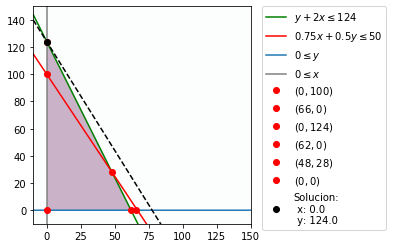

In [5]:
Max_4()

********************************************

# MA2 - Tarea 2.2: ¿Dulcero o goloso? <a name="2.2"></a>

### Ejercicio 1

>En un obrador tradicional han decidido sustituir la propanga en papel por la propaganda por redes sociales y correo electrónico. Recientemente han enviado una oferta de cupcakes, ofertando a su clientela dos tipos: el primero como decoración solo tiene glasesado y el segundo tipo incluye un relleno y algún trozo de fruta de temporada.

>Además, se venden por cajas de dos formatos: para dulceros y para golosos, como puedes ver en su propaganda:

  

In [7]:
from IPython.display import IFrame
IFrame('https://view.genial.ly/5ca22e42729926491686b63b', width='100%', height=350)

In [8]:
IFrame('https://view.genial.ly/5ca2330c729926491686bcf4', width='100%', height=350)

>Si actualmente en el obrador hay 200 cupcakes del tipo 1 y 160 del tipo 2. Calcula de forma razonada cuántas cajas han de vender de cada tipo para que el beneficio sea máximo. Para ello sigue los siguientes pasos:

+ Elige las incógnitas convenientemente y escribe las restricciones del problema .


|        	| cupcakes1 	| cupcakes2 	| TOTAL 	|  €  	|
|:------:	|:---------:	|:---------:	|:-----:	|:---:	|
| Caja 1 	|     4X    	|     2X    	|   6X  	|  8X 	|
|  Caja2 	|     4Y    	|     4Y    	|   8Y  	| 12Y 	|
| Oferta 	|    200    	|    160    	|  360  	|     	|

In [5]:
x,y,z = sp.symbols('x y z')
from sympy.solvers.inequalities import reduce_inequalities


eq1 = sp.Function('eq1')
eq2 = sp.Function('eq2')
eq3 = sp.Function('eq3')
eq4 = sp.Function('eq4')


eq1 = reduce_inequalities(x>=0)
eq2 = reduce_inequalities(y>=0)
eq3 = reduce_inequalities(4*x + 4*y<=200, [x])
eq4 = reduce_inequalities(2*x + 4*y<=160, [x])
eq5 = reduce_inequalities(6*x + 8*y<=360, [x])

print('RESTRINGCIONES:\n')
display(eq1)
display(eq2)
display(eq3)
display(eq4)
display(eq5)

RESTRINGCIONES:



+ Escribe la función objetivo.


### F(x,y)=8x+12y

----
+ Representa la región factible y calcula sus vértices.
+ Evalúa la función objetivo en dichos vértices y decide cuál es la opción que nos da el beneficio máximo.

C:\Anaconda3\lib\site-packages\pulp\pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Optimal Result:
Caja1 = 20.0 unds.
Caja2 = 30.0 unds.
Maximizacion Beneficio:
520.0€


Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: 4y+4x=200
Introduce la ecuacion: 4y+2x=160
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: 4y+2x=160
Introduce la ecuacion: x=0
Introduce la ecuacion: q
Presiona "q" para terminar de introducir los segmentos a tomar
Introduce la ecuacion: 4y+4x=200
Introduce la ecuacion: y=0
Introduce la ecuacion: q


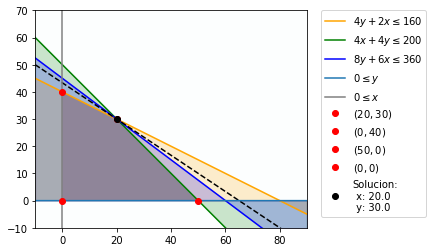

In [5]:
Max_u2()

----

# MA2 - Tarea 2.3: Con la ayuda de la tecnología, mejor <a name="2.3"></a>

### Ejercicio 1

>En primer lugar debes familiarizarte con las dos aplicaciones. Por este motivo te recomendamos que visites la página web de cada una pulsando sobre su logotipo. Además, dispones de material de ayuda compuesto por vídeos, manuales y ejemplos en el apartado "Contenidos y ayuda".

>El siguiente paso será elaborar el contenido de la tarea que deberás entregar, y que a continuación te detallamos:


   + El objetivo es que describas paso a paso cómo realizar con las dos herramientas algunos ejemplos que te proponemos más abajo.


   + Puedes utilizar soporte escrito (presentación, documento, etc) o un vídeo.


   + En el caso de que hayas elegido el soporte escrito debe contener necesariamente: una explicación detallada de cada paso que realices, varias capturas de pantalla que acompañen al texto y donde se aprecie el proceso que vas siguiendo y el resultado final del problema.


   + En el caso de que hayas elegido realizar un vídeo, se debe apreciar todo el proceso que has seguido hasta llegar a la solución final, con el sonido de los comentarios explicativos que realices. Al principio del vídeo debes identificarte indicando tu nombre.


   + Para que te resulte más fácil te proponemos los ejemplos que debes realizar. No es necesario que realices los cuatro problemas, pero sí debes elegir al menos 1 problema para resolverlo con cada aplicación.


   + Por lo tanto, se trata de que a través de varios ejemplos expliques el funcionamiento de estas dos aplicaciones informáticas. 


![alt text](http://agrega.juntadeandalucia.es/repositorio/12062019/ec/es-an_2019061212_9130215/Imagen_Problemas.png "Tarea")

***


#### Utilizando Matplotlib <a name="2.3.5"></a>

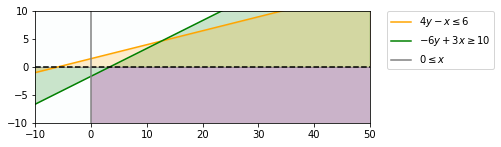

In [52]:
x = np.linspace(-10,50,2000)
y1 = (10 -3*x)/-6
y2 = (6+x)/4
y3= 0*x

plt.plot(x, y2,color='orange', label=r'$4y-x\leq6$')
plt.plot(x, y1,'g', label=r'$-6y+3x\geq10$')

plt.plot(x, y3,'k--')

plt.axvline(0,color='grey', label=r'$0\leq x $') 

plt.xlim((-10, 50))
plt.ylim((-10, 10))

plt.fill_between(x,y1, color='green', alpha=0.2)
plt.fill_between(x,y2, color='orange', alpha=0.2)
plt.fill_between(x,y3, color='blue', alpha=0.2)

plt.legend(loc="upper left")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

d = np.linspace(-10,50,2000)

x,y = np.meshgrid(d,d)
region = plt.imshow( ((0>=y) & (0<=x) & (3*x-6*y>=10) & (-x+4*y <=6)).astype(float) , 
               extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="BuPu", alpha = 0.3);
plt.show()

***


#### Utilizando Sympy <a name="2.3.4"></a>

In [18]:
A = Matrix([[5, 2, -3],[1, -3, 4],[6, 0, -1]])
B = Matrix([[8, 3, -1], [1, 1, 5], [-3, 4, 2]])
print('A')
display(A)
print('B')
display(B)

A


⎡5  2   -3⎤
⎢         ⎥
⎢1  -3  4 ⎥
⎢         ⎥
⎣6  0   -1⎦

B


⎡8   3  -1⎤
⎢         ⎥
⎢1   1  5 ⎥
⎢         ⎥
⎣-3  4  2 ⎦

In [27]:


AB = A*B
AB_i = AB**-1
print('AB')
display(AB)

print('\n')
print('AB_i')
display(C)

print('\n')
print('Matriz Identidad')
sp.eye(3)

AB


⎡51  5   -1⎤
⎢          ⎥
⎢-7  16  -8⎥
⎢          ⎥
⎣51  14  -8⎦



AB_i


⎡        -13    12  ⎤
⎢8/1111  ────  ──── ⎥
⎢        1111  1111 ⎥
⎢                   ⎥
⎢ 232    357   -415 ⎥
⎢ ────   ────  ─────⎥
⎢ 1111   2222   2222⎥
⎢                   ⎥
⎢ 457    459   -851 ⎥
⎢ ────   ────  ─────⎥
⎣ 1111   2222   2222⎦



Matriz Identidad


⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

***


#### Utilizando Numpy <a name="2.3.3"></a>

In [17]:
x,y,z = sp.symbols('x y z')

print('Calcula el Rango y el Determinante:\n')

#A = Matrix([[2,3,4], [1,4,-2],[-5,7,6]])
Aa = Matrix([[2, 3, 4],[1, 4, -2],[-5, 7, -6]])
display(Aa)

a = np.array([[2,3,4], [1,4,-2],[-5,7,6]]) 

print(f'\nDeterminante: {int(np.linalg.det(a))}')
 
print(f'\nRango: {np.linalg.matrix_rank(a)}')




print('\nResuelve el siguiente sistema:\n')

eq11 = sp.Function('eq11')
eq22 = sp.Function('eq22')
eq33 = sp.Function('eq33')

eq11 = Eq(5*x-1*y+3*z,-1)
eq22 = Eq(-1*x+2*y-2*z,9)
eq33 = Eq(4*x+6*y+1*z,13)

display(eq11)
display(eq22)
display(eq33)

A = np.array([[5, -1, 3],
              [-1, 2, -2],
              [4, 6, 1]])
B = np.array([-1, 9, 13])

x = np.linalg.solve(A, B)

print('\nSoluciones:\n')
print(f'x:{int(x[0])}\ny:{int(x[1])}\nz:{int(x[2])}')

Calcula el Rango y el Determinante:



⎡2   3  4 ⎤
⎢         ⎥
⎢1   4  -2⎥
⎢         ⎥
⎣-5  7  -6⎦


Determinante: 196

Rango: 3

Resuelve el siguiente sistema:




Soluciones:

x:3
y:0
z:-5


----

#### Utilizando Matrix Mathway <a name="2.3.1"></a>

In [1]:
from IPython.display import IFrame
IFrame('https://www.mathway.com/es/Algebra', width='100%', height=650)

----

#### Utilizando Matrix Calculator <a name="2.3.2"></a>

In [2]:
IFrame('https://matrixcalc.org/es/', width='100%', height=650)

----